## Analysis of Maze Generation Algorithms

Maze generation algorithms are an interesting branch of computing resulting from the need to generate larger and more complex mazes faster as it is just as important of a metric as the speed of the traversal to maze traversal algorithms. Maze traversal algorithms are important to many fields such as biology, chemistry, sociology, physics, and information science because at the most basic level, a maze is simply a complex network of nodes and traversing such networks is a problem that lies in the heart of many of the most important problems today. For example, route planning can be thought of as finding the fastest and most efficient way from two nodes within a network, or two cells within a maze. <br/>

This project will be expanding upon my midterm project and focusing on comparing Eller's algorithm with the much less complex Binary Tree Algorithm as well as providing working a working example of each algorithm.

In [45]:
# Library Imports and Variable Initialization

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from timeit import default_timer as timer
import random as rd


def drawState(state):
    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')
    plt.pcolormesh(state, cmap=plt.get_cmap('binary'))
    plt.axis('off')
    plt.show()


def animateStates(states, name):
    # For a better viewing experience
    lastState = states[len(states)-1]
    for i in range(int(len(states)/10)):
        states.append(lastState)

    fig, ax = plt.subplots()
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    p = plt.pcolormesh(states[0], cmap=plt.get_cmap('binary'))

    def update(i):
        p.set_array(states[i])
        return p

    ani = animation.FuncAnimation(
        fig, update, frames=range(0, len(states), 1), interval=10)
    ani.save(name + '.gif', animation.PillowWriter(fps=20))
    ani.save(name + '.mp4', animation.FFMpegWriter(fps=20))


### Eller's Algorithm

Eller's Algorithm is one of the most facinating Maze Generation Algorithms capable of generating mazes of infinite sizes in linear time. It does so by building the maze one row at a time making extensive use of sets to keep track of how each row is connected to the previous row. The general process is you start with a row where each cell is an element of its own unique set. Then randomly union adjacent sets. The remaining sets will be divided by a wall. Now for each set, iterate through each of its elements and randomly create a wall while also making sure each set has at least one connection to the next row. This completes one row of the maze.

In [46]:
# Utilities for Eller's Algorithm

class Cell:
    def __init__(self):
        self.set = []
        self.hasRightWall = False
        self.hasTopWall = False


def initSets(cells, sets):
    for cell in cells:
        if(len(cell.set) == 0):
            cell.set.append(cell)
            sets.append(cell.set)


def joinRight(cells):
    for i in range(len(cells)-1):
        if(bool(rd.getrandbits(1)) or (cells[i].set == cells[i+1].set)):
            cells[i].hasRightWall = True
        else:
            cells[i+1].set.remove(cells[i+1])
            cells[i].set.append(cells[i+1])
            cells[i+1].set = cells[i].set
    cells[len(cells)-1].hasRightWall = True


def joinTop(sets):
    for set in sets:
        if(len(set) > 0):
            for cell in set:
                walls = 1
                if((walls < len(set)) and bool(rd.getrandbits(1))):
                    cell.hasTopWall = True
                    walls += 1
        else:
            sets.remove(set)


def initNext(cells):
    for cell in cells:
        cell.hasRightWall = False
        if(cell.hasTopWall):
            cell.set.remove(cell)
            cell.set = []
            cell.hasTopWall = False


def toMaze(states, maze, cells, y):
    for x in range(len(cells)):
        maze[y*2+2][x*2+2] = 1
        if(cells[x].hasRightWall):
            maze[y*2+1][x*2+2] = 1
        if(cells[x].hasTopWall):
            maze[y*2+2][x*2+1] = 1
    states.append(np.copy(maze))


In [47]:
def eller_algorithm(size):
    cells = []
    sets = []

    states = []

    maze = np.zeros((size[0]*2+1)*(size[1]*2+1)
                    ).reshape(size[1]*2+1, size[0]*2+1)
    maze[0] = 1
    maze[:, 0] = 1

    for i in range(size[1]):
        if (i == 0):
            for j in range(size[0]):
                cells.append(Cell())
        initSets(cells, sets)
        if (i == size[1]-1):
            for j in range(size[0]):
                cells[j].hasTopWall = True
                if (j == size[0]-1):
                    cells[j].hasRightWall = True
                elif (cells[j].set == cells[j+1].set):
                    cells[j].hasRightWall = True
            toMaze(states, maze, cells, i)
            continue
        for j in range(size[0]-1):
            if(cells[j].set == cells[j+1].set):
                cells[j].hasRightWall = True
        joinRight(cells)
        joinTop(sets)
        toMaze(states, maze, cells, i)
        initNext(cells)
    return maze, states


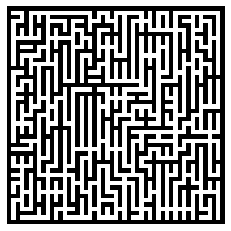

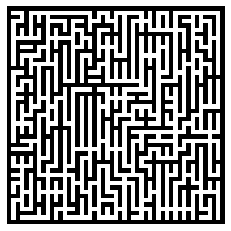

In [48]:
# Draw Eller Maze
size = [25, 25]

maze, states = eller_algorithm(size)

drawState(maze)
animateStates(states, "Eller")


### Binary Tree Algorithm

Binary Tree Algorithm is another maze generation algorithm, but one of the most simple. Say we start from the lower left corner of a 2d maze as I do here, then we interate through the entire maze and for each cell we decide whether to remove the north or east wall provided the wall is not part of the border.

In [49]:
# Utility functions for Binary Tree Algorithm

# For every cell, update surrounding walls
def update_bt(x, y, maze, states):
    maze[y*2+1][x*2+1] = 0
    if ((y == size[1]-1) and (x == size[0]-1)):
        pass
    elif ((x != size[0]-1) and bool(rd.getrandbits(1)) or (y == size[1]-1) and (x != size[0]-1)):
        maze[y*2+1][x*2+2] = 0
    else:
        maze[y*2+2][x*2+1] = 0
    states.append(np.copy(maze))


In [50]:
def binary_tree_algorithm(size):
    maze = np.ones((size[0]*2+1)*(size[1]*2+1)
                   ).reshape(size[1]*2+1, size[0]*2+1)
    states = []
    for i in range(size[1]):
        for j in range(size[0]):
            update_bt(j, i, maze, states)
    return maze, states


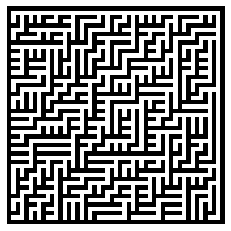

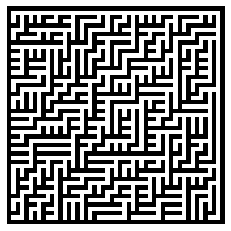

In [51]:
# Draw Binary Tree Maze

size = [25, 25]
maze, states = binary_tree_algorithm(size)

drawState(maze)
animateStates(states, "BinaryTree")


In [54]:
# Testing Utility Function

def test(size, N):
    eller = 0
    bt = 0
    for i in range(N):
        start = timer()
        eller_algorithm(size)
        eller += timer() - start

        start = timer()
        binary_tree_algorithm(size)
        bt += timer()-start
    print("Size: ", size)
    print("Average time taken for Eller Algorithm: ", eller/N)
    print("Average time taken for Binary Tree Algorithm: ", bt/N)
    print("Percent difference of the averages: ", (bt-eller)/eller*100)
    print()


In [55]:
N = 100

test([10, 10], N)
test([25, 25], N)
test([25, 50], N)
test([50, 25], N)
test([50, 50], N)


Size:  [10, 10]
Average time taken for Eller Algorithm:  0.00023312499979510903
Average time taken for Binary Tree Algorithm:  0.00034936000243760643
Percent difference of the averages:  49.85951860360539

Size:  [25, 25]
Average time taken for Eller Algorithm:  0.0012092159932944923
Average time taken for Binary Tree Algorithm:  0.0036537980032153427
Percent difference of the averages:  202.16256016103625

Size:  [25, 50]
Average time taken for Eller Algorithm:  0.002451786001911387
Average time taken for Binary Tree Algorithm:  0.011861296999268234
Percent difference of the averages:  383.781903886444

Size:  [50, 25]
Average time taken for Eller Algorithm:  0.0022338160057552158
Average time taken for Binary Tree Algorithm:  0.011938096992671489
Percent difference of the averages:  434.4261551494891

Size:  [50, 50]
Average time taken for Eller Algorithm:  0.005020753999706358
Average time taken for Binary Tree Algorithm:  0.06235157801187597
Percent difference of the averages:  114

### Conclusion

For very small mazes, there is a small but noticible difference between Eller's algorithm and Binary Tree algorithm with a percent difference of about 50% </br>
As the maze grows larger, Eller's linear growth compared to Binary Tree's square growth becomes increasingly obvious with a percent difference of about 1142% when generating square mazes of size 50. </br>
Also for uneven mazes, Eller's Bias towards "taller" mazes is in full display as it has a percent difference of about 434% for a taller maze of size [50, 25] compared to about 384% for a wider maze of size [25, 50] when Binary Tree's average time is about .012 seconds for both mazes. </br>
The implementation of Eller's Algorithm here is nowhere near optimized, and I'm sure neither is my implementation of Binary Tree algorithm. One minor thing I would like to do if I had more time would be to add a 3rd algorithm for comparison, the room recursive division algorithm.

### Sources Used

- https://weblog.jamisbuck.org/2010/12/29/maze-generation-eller-s-algorithm
- http://weblog.jamisbuck.org/2011/2/1/maze-generation-binary-tree-algorithm
- https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html
- https://holypython.com/how-to-save-matplotlib-animations-the-ultimate-guide/